# Imports

In [1]:
# Local import
import XML_function

In [2]:
# Global imports
import os

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from json import dumps
from collections import OrderedDict

from xmljson import badgerfish as bf
from xmljson import parker, Parker

import xml.etree.ElementTree as et

In [3]:
# Silence warnings
import warnings
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None

# Extraction

In [4]:
f = open("XML/Odyssey.xml", "r")
text = f.read()
f.close()

In [5]:
dico = parker.data(et.fromstring(text))

In [6]:
tokens = []

for s in dico['s']:
    tokens.append(len(s['t']))

In [7]:
print(' Mean:', np.mean(tokens), '\n',
      'Median:', np.median(tokens), '\n',
      'Min:', np.min(tokens), '\n',
      'Max:', np.max(tokens), '\n',
      'Std:', np.std(tokens))

 Mean: 15.205410225921522 
 Median: 13.0 
 Min: 2 
 Max: 98 
 Std: 8.89414665322241


In [8]:
df_Odyssey = XML_function.XML_to_dataframe("XML/Odyssey.xml")

In [9]:
df_Odyssey.head(1)

,author,title,sentence,verse,token_position,verse_occurence,morphology,position_in_sentence,word,lemmata_1,lemmata_2,part_of_speech,person,number,tense,mood,voice,gender,case,degree
0,Homer,Odyssey (Greek). Machine readable text,1,1.1_,1,1,n-s---ma-,1,ἄνδρα,ἀνήρ,NaN,noun,NaN,singular,NaN,NaN,NaN,masculine,accusative,NaN


In [33]:
df = df_Odyssey

In [34]:
counter = 0

for file in os.listdir("XML"):
    if file.endswith("perseus-grc2.xml"):      
        
        try:
            df_ = XML_function.XML_to_dataframe("XML/" + str(file))
            df = pd.concat([df, df_])
            
        except:
            print('Error while extracting XML from file', str(file), ': abandon')
        
        print(str(100*counter/240)[:4] + '%')
        counter += 1

0.0%
0.41%
0.83%
1.25%
1.66%
2.08%
Error while extracting XML from file tlg0059.tlg002.perseus-grc2.xml : abandon
2.5%
Error while extracting XML from file tlg0013.tlg021.perseus-grc2.xml : abandon
2.91%
3.33%
3.75%
4.16%
Error while extracting XML from file tlg0085.tlg002.perseus-grc2.xml : abandon
4.58%
5.0%
5.41%
5.83%
Error while extracting XML from file tlg0013.tlg014.perseus-grc2.xml : abandon
6.25%
6.66%
7.08%
7.5%
7.91%
8.33%
8.75%
9.16%
9.58%
10.0%
10.4%
10.8%
11.2%
11.6%
12.0%
12.5%
12.9%
13.3%
Error while extracting XML from file tlg0013.tlg031.perseus-grc2.xml : abandon
13.7%
14.1%
Error while extracting XML from file tlg0003.tlg001.perseus-grc2.xml : abandon
14.5%
15.0%
15.4%
15.8%
16.2%
16.6%
17.0%
17.5%
17.9%
18.3%
18.7%
Error while extracting XML from file tlg0085.tlg006.perseus-grc2.xml : abandon
19.1%
19.5%
Error while extracting XML from file tlg0551.tlg009.perseus-grc2.xml : abandon
20.0%
20.4%
20.8%
21.2%
21.6%
22.0%
22.5%
22.9%
Error while extracting XML from file

In [164]:
len(df_Corpus)

2519682

# Analysis

In [212]:
df_Odyssey = pd.read_csv('data/metadata_odyssey.csv').drop(columns = 'Unnamed: 0')
df_Corpus = pd.read_csv('data/metadata_corpus.csv').drop(columns = 'Unnamed: 0')

In [37]:
ratio = len(df_Corpus)/len(df_Odyssey)

In [38]:
odyssey_word_count = df_Odyssey['word'].value_counts()
corpus_word_count = df_Corpus['word'].value_counts()

odyssey_word_count = pd.DataFrame(odyssey_word_count).reset_index()
corpus_word_count = pd.DataFrame(corpus_word_count).reset_index()

odyssey_word_count = odyssey_word_count.rename(columns = {'word': 'count', 'index': 'word'})
corpus_word_count = corpus_word_count.rename(columns = {'word': 'count', 'index': 'word'})

df_merge = pd.merge(odyssey_word_count, corpus_word_count, on ='word', how = 'inner')

df = df_merge[df_merge['count_x'] >= 100]
df = df[df['count_y'] >= ratio*100]

df['count_ratio'] = (ratio*df['count_x']) / df['count_y']

df.sort_values('count_ratio', ascending = False)

,word,count_x,count_y,count_ratio
3,δʼ,2794,18433,3.733292
15,μοι,433,3622,2.944429
10,δέ,555,4796,2.850201
22,ἐπεὶ,315,3227,2.404214
2,·,3157,39089,1.989215
40,ἐγὼ,212,2715,1.923214
14,ἀλλʼ,441,5717,1.899906
32,νῦν,249,3498,1.753239
31,τις,251,3877,1.594555
26,γε,295,4953,1.466950


In [39]:
odyssey_morpho = df_Odyssey['morphology'].value_counts()
corpus_morpho = df_Corpus['morphology'].value_counts()

odyssey_morpho = pd.DataFrame(odyssey_morpho).reset_index()
corpus_morpho = pd.DataFrame(corpus_morpho).reset_index()

odyssey_morpho = odyssey_morpho.rename(columns = {'morphology': 'count', 'index': 'morphology'})
corpus_morpho = corpus_morpho.rename(columns = {'morphology': 'count', 'index': 'morphology'})

df_merge = pd.merge(odyssey_morpho, corpus_morpho, on ='morphology', how = 'inner')

df_merge['prevalence'] = (df['count_x'] / df['count_y']) * ratio

for ind, row in df_merge.iterrows():
    df_merge['prevalence'][ind] = (row['count_x'] / row['count_y']) * ratio

df_merge = df_merge.sort_values('prevalence', ascending = False)

In [40]:
frame = XML_function.extract_morphology(df_merge['morphology'])

In [41]:
for key in frame.keys():
    df_merge[key] = frame[key]

In [42]:
sns.set(rc={'figure.figsize':(20,15)})
sns.set_style("ticks")
sns.set_context("paper", font_scale=2)                                                  

In [44]:
def get_morpho_count(df):
    
    morpho = df['morphology'].value_counts()
    morpho = pd.DataFrame(morpho).reset_index()
    morpho = morpho.rename(columns = {'morphology': 'count', 'index': 'morphology'})
    
    return morpho

In [123]:
df = df_Corpus[df_Corpus['author'] != 'Homer']
df['id'] = df['title'] + df['author']
ids = (df['id'].value_counts()).index

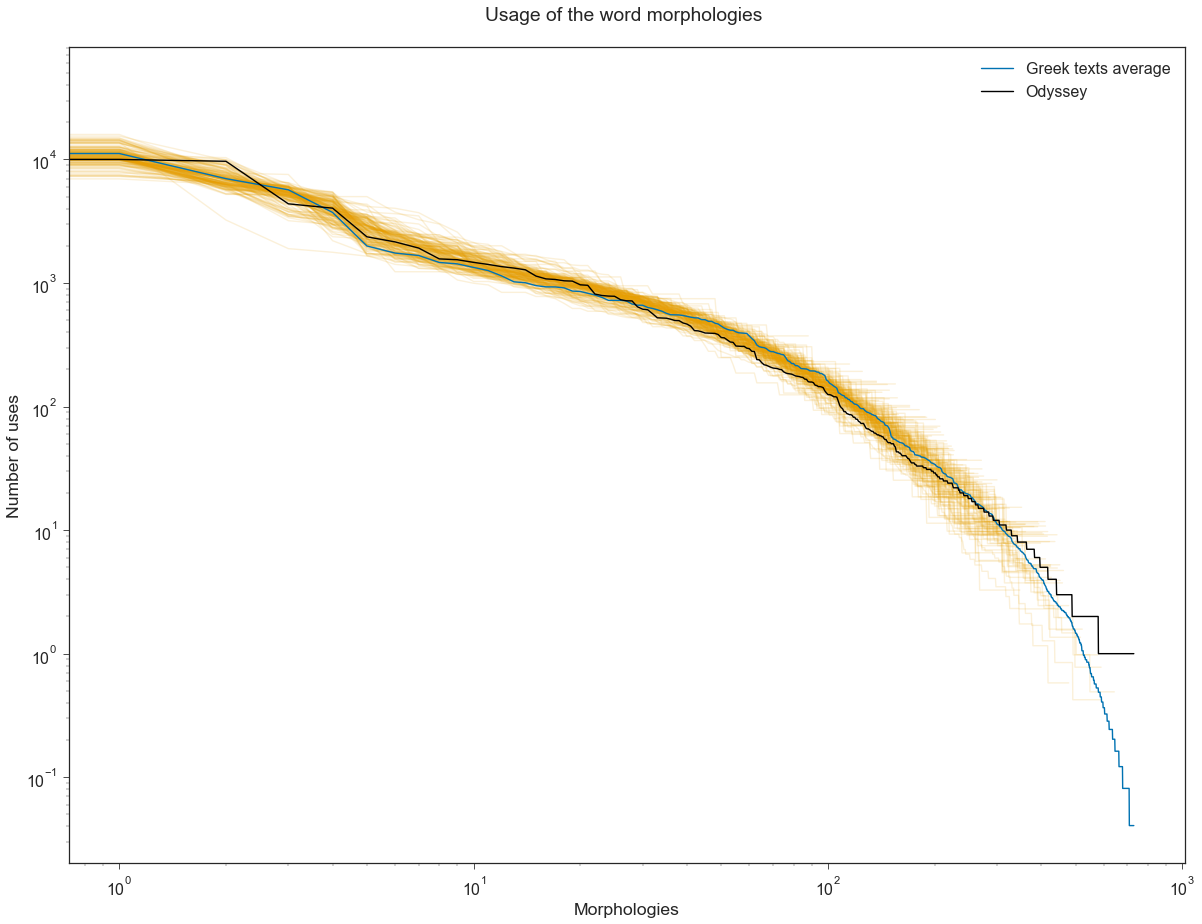

In [127]:
for id_ in ids : 
    df_ = df[df['id'] == id_]
    ratio_ = len(df_)/len(df_Odyssey)
    df_ = get_morpho_count(df_)['count'].sort_values(
        ascending = False).reset_index()['count']
    plt.loglog(df_.index, df_.values/ratio_, color = '#E69F00', alpha=0.15)

df_ = df_merge['count_y'].sort_values(ascending = False).reset_index()['count_y']
plt.loglog(df_.index, df_.values/ratio, label='Greek texts average', color = '#0072B2')

plt.xlabel('Morphologies')
plt.ylabel('Number of uses')
plt.title('Usage of the word morphologies \n')

df_ = df_merge['count_x'].sort_values(ascending = False).reset_index()['count_x']
plt.loglog(df_.index, df_.values, label='Odyssey', color = '#000000')

plt.legend();

In [48]:
def codify_verse(df_, without = ['punctuation']):
    
    df = df_
    
    for condition in without:
        df = df[df['part_of_speech'] != condition]
    
    part_of_speech = { 'n': 'noun', 'v': 'verb', 'a': 'adjective', 'd': 'adverb',
                  'l': 'article', 'g': 'particle', 'c': 'conjunction',
                  'r': 'preposition', 'p': 'pronoun', 'm': 'numeral',
                  'i': 'interjection', 'u': 'punctuation' }
    
    code_pos = {v: k for k, v in part_of_speech.items()}
    
    verses = []

    for verse in df['verse'].value_counts().index:
        code = ''
    
        for ind, row in df[df['verse'] == verse].iterrows():
            try:
                code += code_pos[row['part_of_speech']]
            except:
                pass
    
        verses.append(code)
    
    df_output = pd.DataFrame({'verse': df['verse'].value_counts().index,
                                'code': verses})
    
    return df_output

In [49]:
df_Odyssey_verses = XML_function.codify_verse(df_Odyssey, 
                                              without = ['punctuation', 'particle'])

In [50]:
df_Corpus_verses = XML_function.codify_verse(df_Corpus[df_Corpus['author'] != 'Homer'], 
                                             without = ['punctuation', 'particle'])

In [135]:
df_Corpus_verses = pd.read_csv('data/df_Corpus_verses.csv')
df_Odyssey_verses = pd.read_csv('data/df_Odyssey_verses.csv')

In [52]:
df_Odyssey_verses['code'].value_counts()

pvvan        59
pdnvnv       45
cpvnav       36
dnvan        30
pvvnn        25
pdvan        20
anan         19
nanvv        16
dvcppvv      15
nvan         15
nvvan        15
dparav       15
navan        15
nnnn         14
ccncnrnv     14
ddppvcdv     13
nvdvn        12
nvanv        12
pdvann       12
nnaan        12
vnan         12
nvnvn        12
dvvan        11
dnnav        11
lrnavnv      11
pdvnan       11
dvrnn        11
nvnn         11
pdvnnn       11
dvvnan       11
             ..
cdpvpdanv     1
cdanvpn       1
vnncpv        1
avvddav       1
dpdvapd       1
nvppvan       1
dpnavnn       1
vpdvcdv       1
avnnda        1
pnvvdnv       1
apdvrn        1
vpvdvvp       1
dvvmna        1
andvv         1
ncnapnv       1
vndv          1
vpnavrnn      1
ddvvpvdd      1
dvlvan        1
cpmndnv       1
pvnvnnv       1
ncnnanv       1
dvanna        1
vccddan       1
cddpvav       1
cddannn       1
npcdvn        1
vvavn         1
nppdrvdv      1
dnvanp        1
Name: code, Length: 8745

In [54]:
def get_code_count(df):
    
    code = df['code'].value_counts()
    code = pd.DataFrame(code).reset_index()
    code = code.rename(columns = {'code': 'count', 'index': 'code'})
    
    return code

In [59]:
len(df_Odyssey_verses)

12107

In [147]:
ratio_ = len(df_Corpus_verses)/len(df_Odyssey_verses)

In [167]:
len(df_Odyssey['sentence'].value_counts())

6728

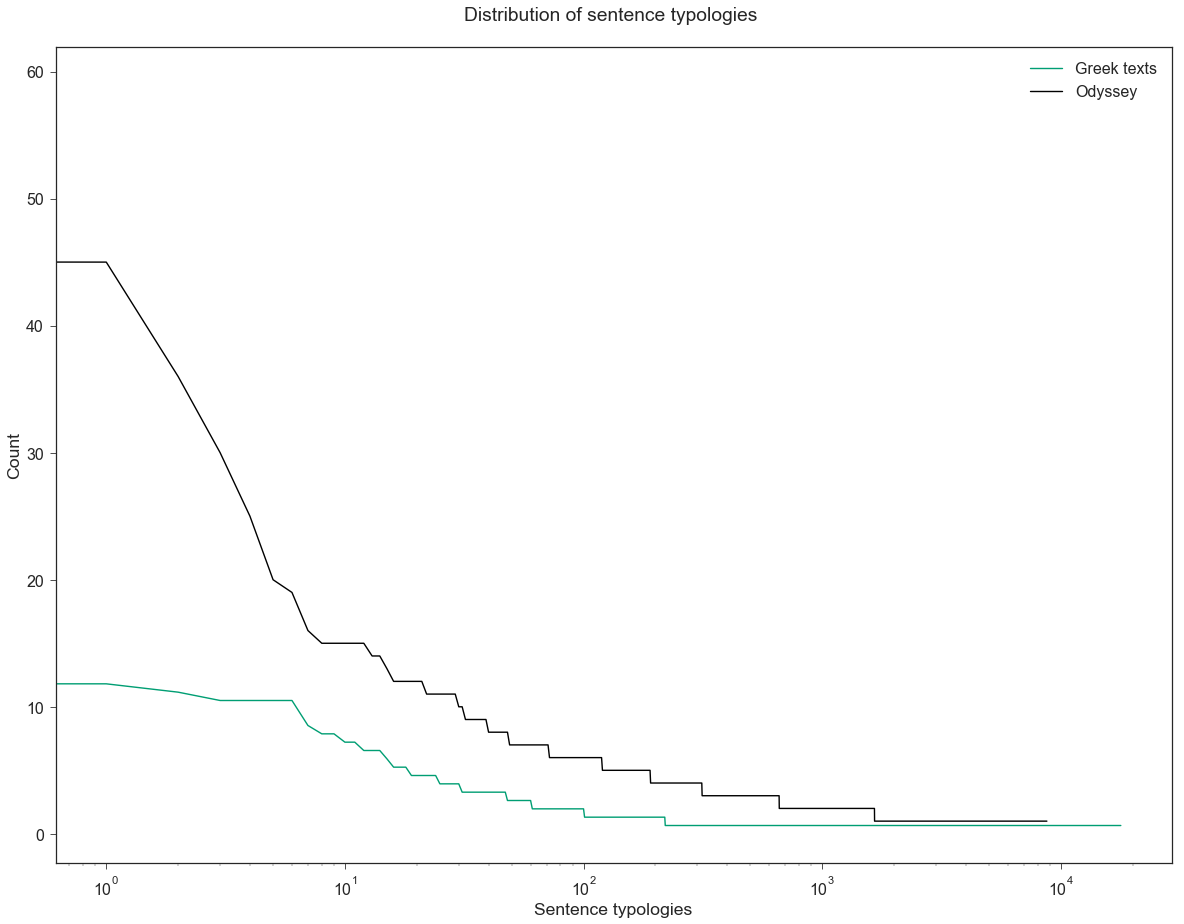

In [152]:
df_ = get_code_count(df_Corpus_verses)['count'].sort_values(
                            ascending = False).reset_index()['count']
plt.semilogx(df_.index, df_.values/ratio_, label='Greek texts', color = '#009E73')

plt.xlabel('Sentence typologies')
plt.ylabel('Count')
plt.title('Distribution of sentence typologies \n')

df_ = get_code_count(df_Odyssey_verses)['count'].sort_values(
                            ascending = False).reset_index()['count']
plt.semilogx(df_.index, df_.values, label='Odyssey', color = '#000000')

plt.legend();

In [69]:
df_Odyssey[df_Odyssey['part_of_speech'] != 'punctuation'][
    'verse'].value_counts().value_counts()

7     3656
8     2920
6     2680
9     1358
5      834
10     412
4      168
11      68
12       9
13       1
3        1
Name: verse, dtype: int64

In [168]:
df_Odyssey.head()

,author,title,sentence,verse,token_position,verse_occurence,morphology,position_in_sentence,word,lemmata_1,lemmata_2,part_of_speech,person,number,tense,mood,voice,gender,case,degree
0,Homer,Odyssey (Greek). Machine readable text,1,1.1_,1,1,n-s---ma-,1,ἄνδρα,ἀνήρ,NaN,noun,NaN,singular,NaN,NaN,NaN,masculine,accusative,NaN
1,Homer,Odyssey (Greek). Machine readable text,1,1.1_,2,1,p-s---md-,2,μοι,NaN,NaN,pronoun,NaN,singular,NaN,NaN,NaN,masculine,dative,NaN
2,Homer,Odyssey (Greek). Machine readable text,1,1.1_,3,1,v2spma---,3,ἔννεπε,ἐνέπω,NaN,verb,second person,singular,present,imperative,active,NaN,NaN,NaN
3,Homer,Odyssey (Greek). Machine readable text,1,1.1_,4,1,u--------,4,",",NaN,",",punctuation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Homer,Odyssey (Greek). Machine readable text,1,1.1_,5,1,n-s---fv-,5,μοῦσα,Μοῦσα,NaN,noun,NaN,singular,NaN,NaN,NaN,feminine,vocative,NaN


In [104]:
full_text = []
for verse in df_Odyssey_verses['verse'].values:
    df = df_Odyssey[df_Odyssey['verse'] == verse]
    df = df[df['part_of_speech'] != 'punctuation']
    
    text = ''
    
    for ind, row in df.iterrows():
        text += row['word'] + ' '
    
    full_text.append(text[:-1])

In [105]:
df_Odyssey_verses['text'] = full_text

In [107]:
repeated_hexameters = df_Odyssey_verses['text'].value_counts()

In [111]:
repeated_hexameters = repeated_hexameters[repeated_hexameters > 1]

In [112]:
len(repeated_hexameters)

770

In [129]:
repeated_hexameters = repeated_hexameters.reset_index()

In [114]:
len(df_Odyssey_verses)

12107

In [115]:
np.sum(repeated_hexameters)

2049

In [117]:
np.sum(repeated_hexameters[repeated_hexameters > 4])

429

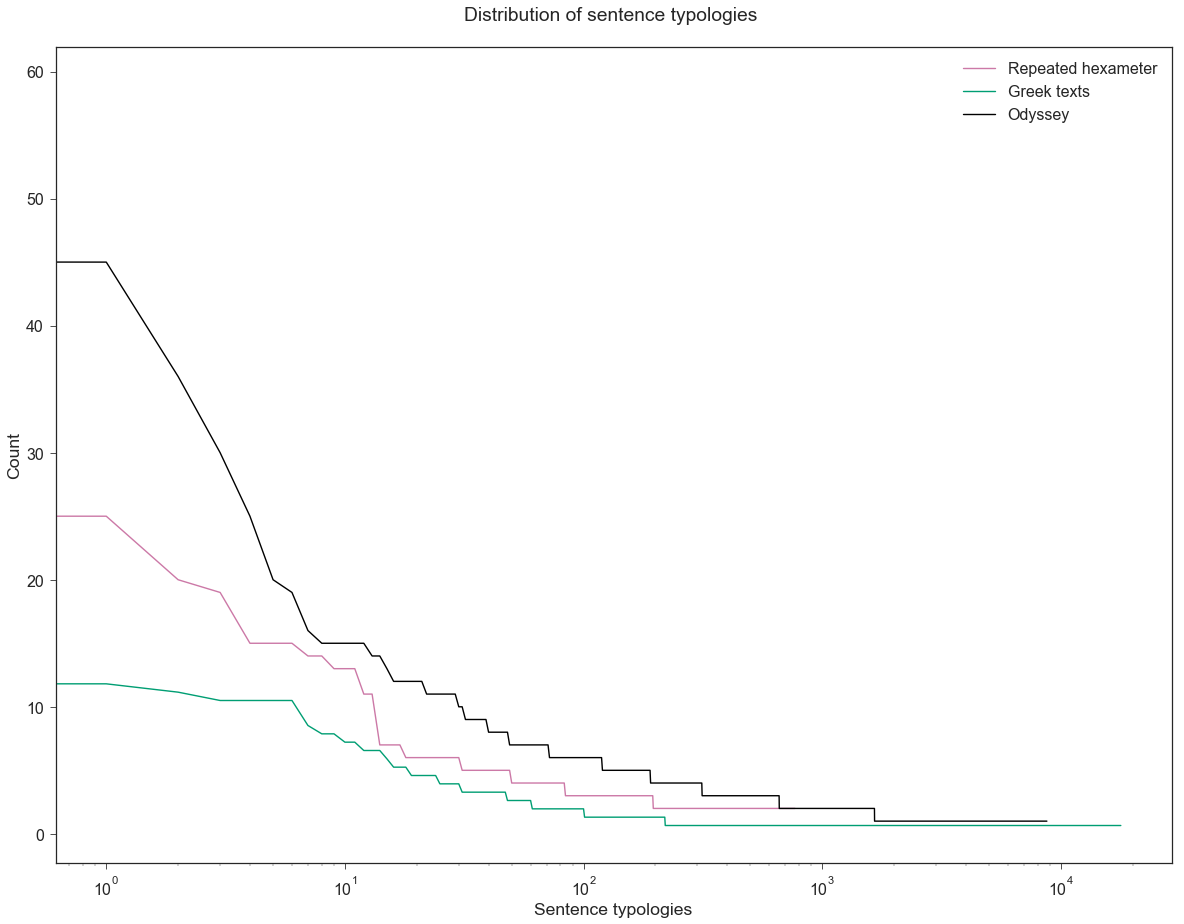

In [153]:
df_ = repeated_hexameters['text']
plt.semilogx(df_.index, df_.values, label='Repeated hexameter', color = '#CC79A7')

df_ = get_code_count(df_Corpus_verses)['count'].sort_values(
                            ascending = False).reset_index()['count']
plt.semilogx(df_.index, df_.values/ratio_, label='Greek texts', color = '#009E73')

plt.xlabel('Sentence typologies')
plt.ylabel('Count')
plt.title('Distribution of sentence typologies \n')

df_ = get_code_count(df_Odyssey_verses)['count'].sort_values(
                            ascending = False).reset_index()['count']
plt.semilogx(df_.index, df_.values, label='Odyssey', color = '#000000')

plt.legend();

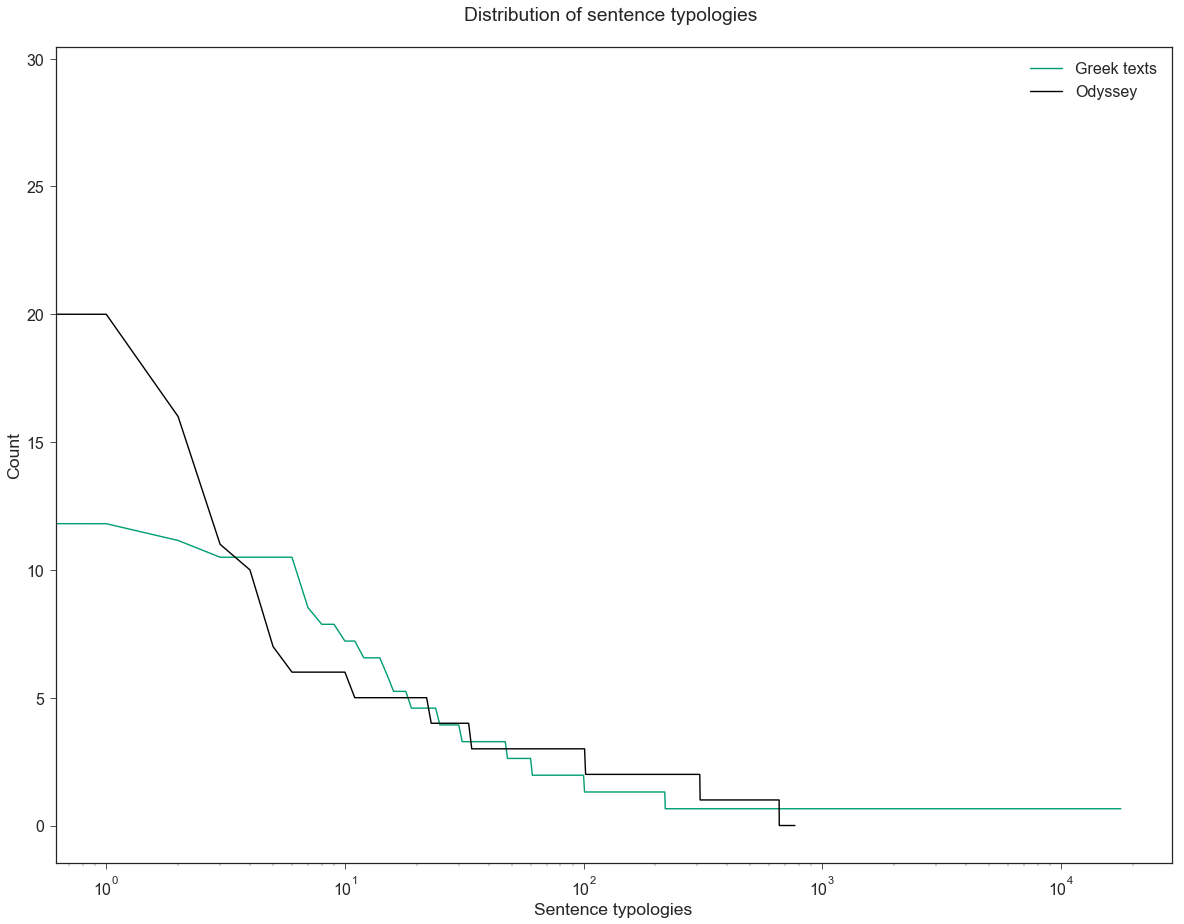

In [163]:
df_ = get_code_count(df_Corpus_verses)['count'].sort_values(
                            ascending = False).reset_index()['count']
plt.semilogx(df_.index, df_.values/ratio_, label='Greek texts', color = '#009E73')

plt.xlabel('Sentence typologies')
plt.ylabel('Count')
plt.title('Distribution of sentence typologies \n')

df_ = (get_code_count(df_Odyssey_verses)['count'].sort_values(
                            ascending = False).reset_index()[
    'count'] - repeated_hexameters['text']).sort_values(ascending = False).reset_index()[0]
plt.semilogx(df_.index, df_.values, label='Odyssey', color = '#000000')

plt.legend();

In [185]:
ratio_ = len(df_Corpus)/len(df_Odyssey)

In [211]:
df_Corpus.head()

AttributeError: 'str' object has no attribute 'head'

In [213]:
df_Corpus['Odyssey'] = 'Others'
df_Corpus[df_Corpus['author'] == 'Homer']['Odyssey'] = 'Odyssey'

In [217]:
df_Corpus[df_Corpus['author'] == 'Homer']

,author,title,sentence,verse,token_position,verse_occurence,morphology,position_in_sentence,word,lemmata_1,...,part_of_speech,person,number,tense,mood,voice,gender,case,degree,Odyssey
0,Homer,Odyssey (Greek). Machine readable text,1,1.1_,1,1,n-s---ma-,1,ἄνδρα,ἀνήρ,...,noun,NaN,singular,NaN,NaN,NaN,masculine,accusative,NaN,Others
1,Homer,Odyssey (Greek). Machine readable text,1,1.1_,2,1,p-s---md-,2,μοι,NaN,...,pronoun,NaN,singular,NaN,NaN,NaN,masculine,dative,NaN,Others
2,Homer,Odyssey (Greek). Machine readable text,1,1.1_,3,1,v2spma---,3,ἔννεπε,ἐνέπω,...,verb,second person,singular,present,imperative,active,NaN,NaN,NaN,Others
3,Homer,Odyssey (Greek). Machine readable text,1,1.1_,4,1,u--------,4,",",NaN,...,punctuation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Others
4,Homer,Odyssey (Greek). Machine readable text,1,1.1_,5,1,n-s---fv-,5,μοῦσα,Μοῦσα,...,noun,NaN,singular,NaN,NaN,NaN,feminine,vocative,NaN,Others
5,Homer,Odyssey (Greek). Machine readable text,1,1.1_,6,2,u--------,6,",",NaN,...,punctuation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Others
6,Homer,Odyssey (Greek). Machine readable text,1,1.1_,7,1,a-s---ma-,7,πολύτροπον,πολύτροπος,...,adjective,NaN,singular,NaN,NaN,NaN,masculine,accusative,NaN,Others
7,Homer,Odyssey (Greek). Machine readable text,1,1.1_,8,3,u--------,8,",",NaN,...,punctuation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Others
8,Homer,Odyssey (Greek). Machine readable text,1,1.1_,9,1,p-s---mn-,9,ὃς,ὅς,...,pronoun,NaN,singular,NaN,NaN,NaN,masculine,nominative,NaN,Others
9,Homer,Odyssey (Greek). Machine readable text,1,1.1_,10,1,d--------,10,μάλα,μάλα,...,adverb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Others


In [215]:
df_Corpus.head()

,author,title,sentence,verse,token_position,verse_occurence,morphology,position_in_sentence,word,lemmata_1,...,part_of_speech,person,number,tense,mood,voice,gender,case,degree,Odyssey
0,Homer,Odyssey (Greek). Machine readable text,1,1.1_,1,1,n-s---ma-,1,ἄνδρα,ἀνήρ,...,noun,NaN,singular,NaN,NaN,NaN,masculine,accusative,NaN,Others
1,Homer,Odyssey (Greek). Machine readable text,1,1.1_,2,1,p-s---md-,2,μοι,NaN,...,pronoun,NaN,singular,NaN,NaN,NaN,masculine,dative,NaN,Others
2,Homer,Odyssey (Greek). Machine readable text,1,1.1_,3,1,v2spma---,3,ἔννεπε,ἐνέπω,...,verb,second person,singular,present,imperative,active,NaN,NaN,NaN,Others
3,Homer,Odyssey (Greek). Machine readable text,1,1.1_,4,1,u--------,4,",",NaN,...,punctuation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Others
4,Homer,Odyssey (Greek). Machine readable text,1,1.1_,5,1,n-s---fv-,5,μοῦσα,Μοῦσα,...,noun,NaN,singular,NaN,NaN,NaN,feminine,vocative,NaN,Others


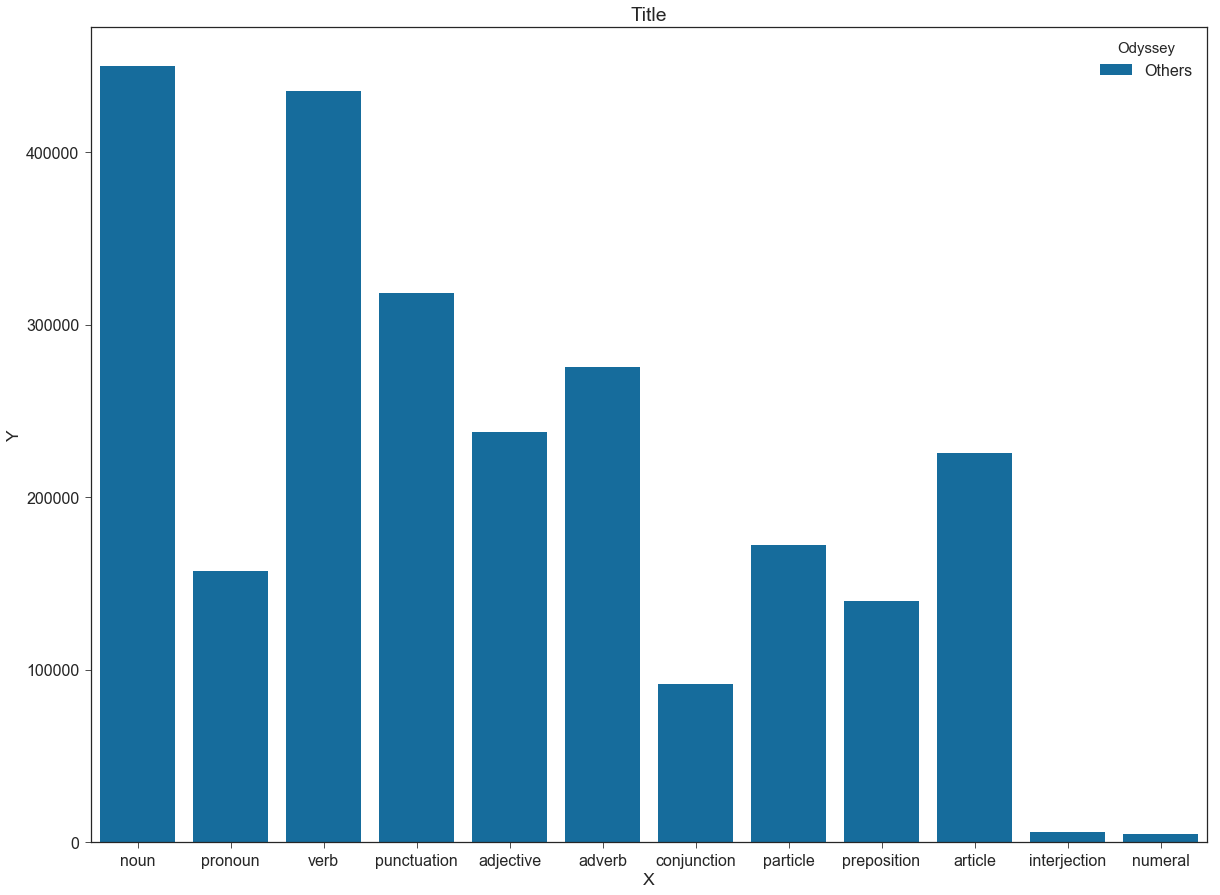

In [214]:
fig = sns.countplot(x = 'part_of_speech', hue = 'Odyssey', data = df_Corpus, orient='v', palette ='colorblind');

#fig = sns.countplot(x = 'part_of_speech', data = df_Corpus, orient='v', palette ='colorblind');

fig.set_title("Title");
fig.set_xlabel("X");
fig.set_ylabel("Y");